In [ ]:
# install opencv
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install timeout decorator
pip install timeout_decorator

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files
drive.mount("/content/drive", force_remount=True)

from matplotlib import pyplot as plt

# Download images from online videos

In [ ]:

vidcap = cv2.VideoCapture("/content/drive/MyDrive/Brad_dataset/videos/Brad5.mp4")
success,image = vidcap.read()
count = 451

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

face_paths = []
while success and count<=600:
  if count <=550:
    cv2.imwrite("/content/drive/MyDrive/Brad_dataset/images/training/frame%d.jpg" % count, image)     # save frame as JPEG file    
    face_paths.append("/content/drive/MyDrive/Brad_dataset/images/training/frame%d.jpg" % count)  
    success,image = vidcap.read()
  else:
    cv2.imwrite("/content/drive/MyDrive/Brad_dataset/images/testing/frame%d.jpg" % count, image)     # save frame as JPEG file    
    face_paths.append("/content/drive/MyDrive/Brad_dataset/images/testing/frame%d.jpg" % count)  
    success,image = vidcap.read()

  #print('Read a new frame: ', success)
  count += 1

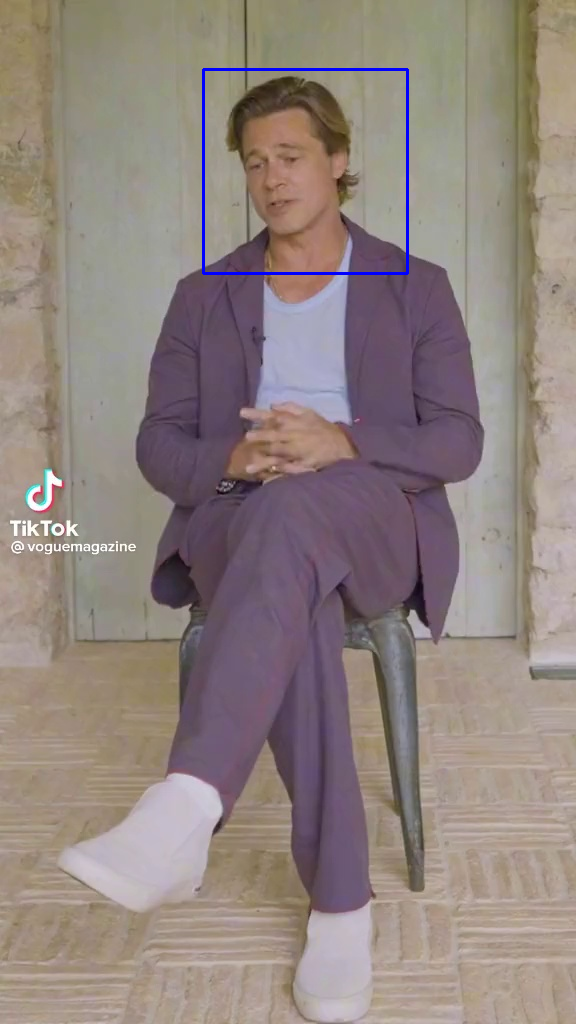

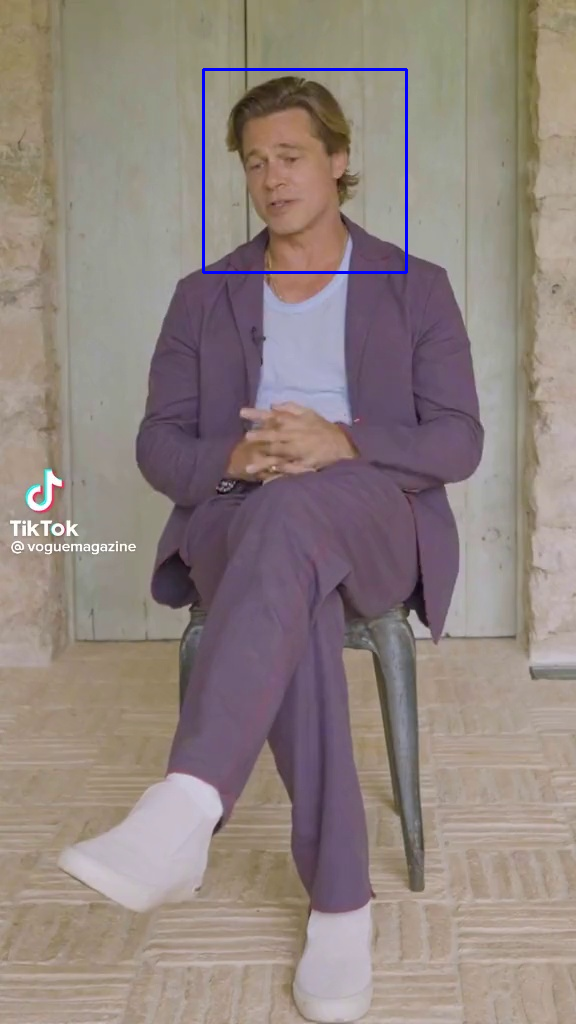

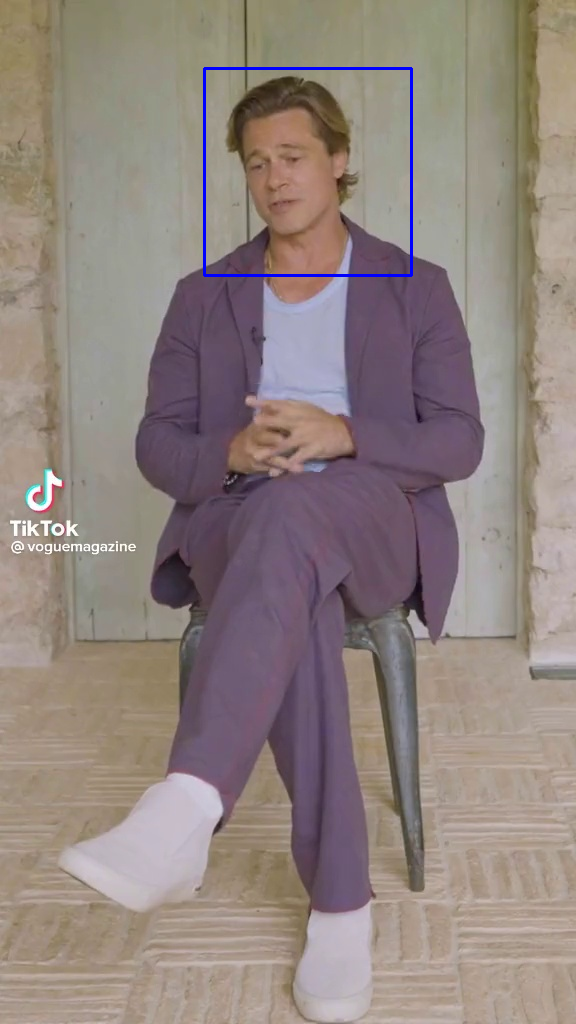

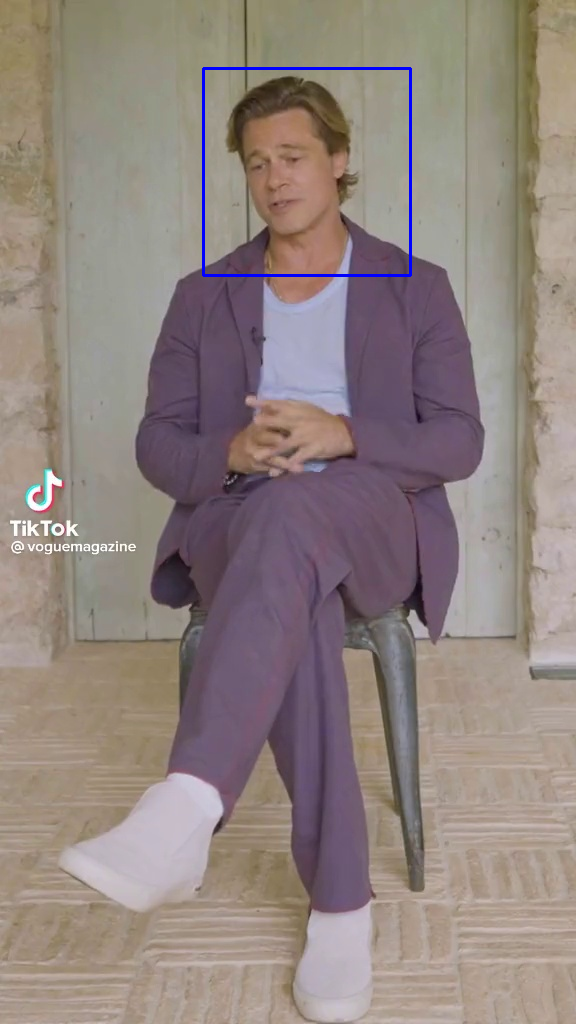

error: ignored

In [ ]:
for face in face_paths:
  img = cv2.imread(face)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
      x,y,w,h = x-20,y-50,w+100,h+100
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      roi_gray = gray[y:y+h, x:x+w]
      roi_color = img[y:y+h, x:x+w]

In [ ]:
vidcap = cv2.VideoCapture("/content/drive/MyDrive/Brad_dataset/videos/Brad5.mp4")
success,image = vidcap.read()
count = 0

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

face_paths = []
while success:
    cv2.imwrite("/content/drive/MyDrive/Brad_dataset/images/training/frame%d.jpg" % count, image)     # save frame as JPEG file    
    face_paths.append("/content/drive/MyDrive/Brad_dataset/images/training/frame%d.jpg" % count)  
    success,image = vidcap.read()

In [ ]:
def main():
    
    # reading the input
    cap = cv2.VideoCapture("/content/drive/MyDrive/Brad_dataset/videos/Brad9.mp4")
    output = cv2.VideoWriter("/content/drive/MyDrive/Brad_dataset/videos/Brad9_out.mp4")
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
    while(True):
        ret, frame = cap.read()
        if(ret):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)            
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            for (x,y,w,h) in faces:
                x,y,w,h = x-20,y-50,w+100,h+100
                img = cv2.rectangle(frame ,(x,y),(x+w,y+h),(255,0,0),2)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = img[y:y+h, x:x+w]
            # writing the new frame in output
            output.write(frame)
            cv2_imshow(frame)
            if cv2.waitKey(1) & 0xFF == ord('s'):
                break
        else:
            break
  
    cv2.destroyAllWindows()
    output.release()
    cap.release()

if __name__ == "__main__":
    main()

# Donloading images from PubFig

In [ ]:
filepath = '/content/drive/MyDrive/CIS 5810 Final Project/Data/eval_urls.txt'
eval_people = pd.read_csv(filepath, sep='\t', skiprows=1)

In [ ]:
eval_people

,person,imagenum,url,rect,md5sum
0,Aaron Eckhart,1,http://farm1.static.flickr.com/119/288329997_1...,"248,92,338,182",a980a9e21c90ff62e57345fad53a56c8
1,Aaron Eckhart,2,http://farm1.static.flickr.com/35/99344798_f2a...,"267,138,419,290",8b2bc3a7a3b4a9d5826cd31ac9254924
2,Aaron Eckhart,4,http://2.bp.blogspot.com/_DxSfGxvclek/SH-K403d...,"32,39,94,101",994b9bfd1464936488458d2679e05520
3,Aaron Eckhart,5,http://2.bp.blogspot.com/_biK-MLwOHEc/RtXJ3nA4...,"75,66,183,174",d50214036344a000cdf1e68832acf33f
4,Aaron Eckhart,6,http://3.bp.blogspot.com/_bto58WjLomw/Rk1yrB-r...,"65,66,133,134",626836ef2e4c2afdcaa6ad8bc1842778
...,...,...,...,...,...
42456,William Macy,96,http://farm1.static.flickr.com/62/207526936_d9...,"504,174,694,364",2df2257b04cd4f3c23ce95d67e867e2c
42457,William Macy,97,http://farm1.static.flickr.com/98/243909925_1a...,"275,182,429,336",af91f80483ef3aa34ca2f80ab91c09b3
42458,William Macy,98,http://farm1.static.flickr.com/91/245712735_4d...,"908,564,1200,857",bd1e84385beed6c5dca4f90d044ddda3
42459,William Macy,99,http://farm1.static.flickr.com/33/39937487_72a...,"373,259,479,365",d724cfd1decebac4d6ee79e799807f88


In [ ]:
brad = eval_people[eval_people['person'] == 'Brad Pitt']
brad

,person,imagenum,url,rect,md5sum
5896,Brad Pitt,1,http://farm1.static.flickr.com/43/100299048_85...,"185,118,347,280",bf76ff84c17d5f751b7fcf0293ac0d49
5897,Brad Pitt,2,http://farm1.static.flickr.com/39/100299580_df...,"705,79,823,197",ba2767bd2064b02e8476c67ecfc0006e
5898,Brad Pitt,3,http://farm1.static.flickr.com/8/10090770_9569...,"112,101,246,235",d4a5463ee99c51665eaa0577e10ce83d
5899,Brad Pitt,4,http://farm1.static.flickr.com/19/106208948_14...,"86,65,180,159",043aa0347861cb40dfbcb86012231f71
5900,Brad Pitt,5,http://farm1.static.flickr.com/40/106209220_f5...,"142,92,216,166",74df975524e27ab62e673f2fbfc5c15d
...,...,...,...,...,...
6946,Brad Pitt,1082,http://i7.tinypic.com/8gegj6a.jpg,"678,102,818,242",d10867fea94b9fcbbe471197da93da1a
6947,Brad Pitt,1083,http://i8.tinypic.com/7wza2x4.jpg,"135,66,211,142",ce57e025586d5e8868179c920a9f875c
6948,Brad Pitt,1084,http://i9.tinypic.com/449aohx.jpg,"20,93,98,171",8fc9fe86ec2d1e2a263eb654c5960621
6949,Brad Pitt,1085,http://i9.tinypic.com/67rmqmf.jpg,"151,94,245,188",7f92ce5eb32c61e474d2ff8f3a319441


In [ ]:
others = eval_people[(eval_people['person'] != 'Brad Pitt')]
others

,person,imagenum,url,rect,md5sum
0,Aaron Eckhart,1,http://farm1.static.flickr.com/119/288329997_1...,"248,92,338,182",a980a9e21c90ff62e57345fad53a56c8
1,Aaron Eckhart,2,http://farm1.static.flickr.com/35/99344798_f2a...,"267,138,419,290",8b2bc3a7a3b4a9d5826cd31ac9254924
2,Aaron Eckhart,4,http://2.bp.blogspot.com/_DxSfGxvclek/SH-K403d...,"32,39,94,101",994b9bfd1464936488458d2679e05520
3,Aaron Eckhart,5,http://2.bp.blogspot.com/_biK-MLwOHEc/RtXJ3nA4...,"75,66,183,174",d50214036344a000cdf1e68832acf33f
4,Aaron Eckhart,6,http://3.bp.blogspot.com/_bto58WjLomw/Rk1yrB-r...,"65,66,133,134",626836ef2e4c2afdcaa6ad8bc1842778
...,...,...,...,...,...
42456,William Macy,96,http://farm1.static.flickr.com/62/207526936_d9...,"504,174,694,364",2df2257b04cd4f3c23ce95d67e867e2c
42457,William Macy,97,http://farm1.static.flickr.com/98/243909925_1a...,"275,182,429,336",af91f80483ef3aa34ca2f80ab91c09b3
42458,William Macy,98,http://farm1.static.flickr.com/91/245712735_4d...,"908,564,1200,857",bd1e84385beed6c5dca4f90d044ddda3
42459,William Macy,99,http://farm1.static.flickr.com/33/39937487_72a...,"373,259,479,365",d724cfd1decebac4d6ee79e799807f88


In [ ]:
random_others = others.sample(n=3000, random_state=1) # we only really want 1500, but since many of the photos are no longer available, we will overshoot to guarantee 1500 for our non brad photos
other_urls = random_others['url'].tolist()
random_others

,person,imagenum,url,rect,md5sum
23269,John Travolta,346,http://www.makemeheal.com/news/images/travolta...,"79,93,249,263",35735e6daa6f67de136a3046c365bfd3
10463,Colin Powell,151,http://www.achievement.org/achievers/pow0/larg...,"121,51,251,181",f5a83531d76bdb38be9928937979bbb5
38288,Sigourney Weaver,56,http://www.dvdrama.com/imagescrit2/s/i/g/sigou...,"232,42,362,172",4ee6cb35a556d145f41854918bea7098
24827,Keira Knightley,188,http://o.aolcdn.com/feedgallery/india/i/k/keir...,"67,112,247,292",9ff34db38a5176a8647302e4758cc339
25417,Leonardo DiCaprio,31,http://farm1.static.flickr.com/165/329654168_e...,"244,154,438,348",3e0175562cf1d5d0a33cfa82342957e3
...,...,...,...,...,...
10528,Colin Powell,218,http://www.televisioninternet.com/news/picture...,"333,25,419,111",80bfb8d25e3e8bbf3c76ba1c8e4d6db8
35495,Renee Zellweger,97,http://media.monstersandcritics.com/galleries/...,"174,221,400,447",a3488e5fb320bcd16d9a7729895f83da
12329,Donald Trump,56,http://images.eonline.com/eol_images/Entire_Si...,"120,42,222,144",132a719a68dd9ed876e614519075e538
1472,Alicia Keys,102,http://photos-e.ll.facebook.com/photos-ll-sf2p...,"90,63,200,173",95439dd33523d57b51700bb288e01185


In [ ]:
# download a second batch of data because we didn't get enough the first time
others_not_in_random_others = pd.concat([others,random_others]).drop_duplicates(keep=False) # make sure these are new images we haven't seen before
random_others2 = others_not_in_random_others.sample(n=3000, random_state=1) # we only really want 1500, but since many of the photos are no longer available, we will overshoot to guarantee 1500 for our non brad photos
other_urls = random_others2['url'].tolist()
random_others2

,person,imagenum,url,rect,md5sum
24715,Keira Knightley,76,http://content9.flixster.com/photo/10/91/14/10...,"150,145,384,379",88fd2a214f804b1525b19e62437fdb18
13484,Eliot Spitzer,193,http://i43.photobucket.com/albums/e386/czar046...,"433,144,529,240",ed89fbe7eebbd8eff78d015bdae421f3
21101,Jessica Alba,342,http://www.celebscentral.net/images/users/1305...,"543,103,643,203",9c280e0e29162060141dee15a501a77a
21409,Jessica Simpson,87,http://gc.astrology.com/gc/starstories/19701/j...,"105,72,231,198",77ee7adfcf75e267300e74441cc7dd50
14031,Eva Mendes,250,http://www.instylemagazine.net/wp-content/uplo...,"156,75,264,183",179c72ccc0730742ac0898ae8307ce02
...,...,...,...,...,...
19260,Jennifer Aniston,290,http://www.makemeheal.com/news/images/jennifer...,"186,334,262,410",5e62ca5063ed9b71481097f73e1e1a69
27975,Liv Tyler,252,http://www.hicelebs.com/gallery/liv_tyler/79.jpg,"153,132,307,286",dea95a9f358ae685eb235c30800030f5
27777,Liv Tyler,52,http://images.teamsugar.com/files/upl1/10/1053...,"130,92,288,250",892c968f4466b2ce6cce7cbf841b762c
7540,Cameron Diaz,102,http://images.broadwayworld.com/upload/25451/t...,"122,96,244,218",af9dcd0df3f939cb10c7743fde0511b1


In [ ]:
# duplicate images we'll get
pd.merge(random_others, random_others2, on='url')

,person_x,imagenum_x,url,rect_x,md5sum_x,person_y,imagenum_y,rect_y,md5sum_y
0,Avril Lavigne,539,http://i25.tinypic.com/33zbpyf.jpg,"77,43,161,127",b2f3b6484b6e716fe0f5839beb83708f,Avril Lavigne,540,"280,29,362,111",b2f3b6484b6e716fe0f5839beb83708f
1,Daniel Radcliffe,462,http://i169.photobucket.com/albums/u205/amaros...,"257,134,409,286",a77031b5921cf8186ae05ecbce5a1a45,Daniel Radcliffe,463,"816,894,892,970",a77031b5921cf8186ae05ecbce5a1a45
2,Joaquin Phoenix,195,http://nienor.net/rose/images/art/actors/joaqu...,"214,175,322,283",f6d5829024602eac70eb13546c45dc9e,Joaquin Phoenix,196,"575,372,665,462",f6d5829024602eac70eb13546c45dc9e
3,Avril Lavigne,381,http://www.faracuvinte.com/albums/userpics/nor...,"386,59,484,157",8b5b6752e1ca796ea3bb2f3ea3828c98,Avril Lavigne,382,"94,31,188,125",8b5b6752e1ca796ea3bb2f3ea3828c98
4,Lindsay Lohan,451,http://images.askmen.com/galleries/other/Event...,"165,50,273,158",050e9ac6d9c4043d0971aff5aa99155c,Lindsay Lohan,135,"165,50,273,158",050e9ac6d9c4043d0971aff5aa99155c
5,Orlando Bloom,669,http://i176.photobucket.com/albums/w177/Xcudda...,"373,91,449,167",1163b97f594c9359682f13907df87599,Orlando Bloom,668,"598,96,684,182",1163b97f594c9359682f13907df87599


In [ ]:
# random sample of faces that aren't Brad's, equal to the sameish number of Brad faces
other_names = others['person'].unique().tolist()  # list of all people who aren't brad
other_urls = []
other_coords = []
n = len(brad) // len(others['person'].unique())  # number of images to grab from each person
for name in other_names:
    name_df = others[others['person'] == name].reset_index()
    rand_ind = np.random.randint(0, len(name_df), size=n)
    for ind in rand_ind:
        other_urls.append(name_df.iloc[ind]['url'])
        other_coords.append(name_df.iloc[ind]['rect'])

In [ ]:
# get a list of all the urls to grab images from
urls = []
crop_regions = []
urls.extend(brad['url'].tolist())
crop_regions.extend(brad['rect'].tolist())

In [ ]:
# get image sizes in bytes and save small urls to small_urls list
# took 15 minutes
import timeout_decorator
bytes_list = []
small_urls = []
@timeout_decorator.timeout(4) 
def download_image(url):
    response = requests.get(url)
    imbytes = BytesIO(response.content)
    return imbytes.getbuffer().nbytes
    

for i, url in enumerate(other_urls):
    try:
        nbytes = download_image(url)
        if(nbytes > 500000):
            print(i, 'too big')
            continue
        else:
            small_urls.append(url)
            print(i)
    except:
        print(i, 'timed out')
        continue

0
1
2 timed out
3
4
5
6
7
8
9
10 timed out
11
12 too big
13
14
15
16
17
18 timed out
19 timed out
20
21
22
23
24
25
26
27
28
29 timed out
30 timed out
31
32 timed out
33 timed out
34 timed out
35
36
37
38
39
40
41
42
43
44 timed out
45
46
47
48
49
50
51
52 timed out
53
54
55
56
57
58
59 timed out
60
61
62
63 timed out
64
65
66 timed out
67 too big
68 timed out
69
70
71
72 timed out
73
74
75
76
77
78
79 timed out
80
81
82
83 timed out
84
85 timed out
86
87
88
89
90 timed out
91
92
93 timed out
94
95
96
97 timed out
98
99 timed out
100
101 timed out
102
103
104
105
106
107 timed out
108
109
110 timed out
111
112
113
114 timed out
115
116
117
118
119
120
121 timed out
122
123
124
125
126 timed out
127 timed out
128 timed out
129
130
131 timed out
132 timed out
133
134
135
136
137 timed out
138 timed out
139
140
141
142
143
144 timed out
145
146
147
148
149
150
151
152
153
154
155
156 timed out
157
158 timed out
159
160 timed out
161
162
163 timed out
164
165
166
167
168
169
170 timed out


ERROR:urllib3.connection:Certificate did not match expected hostname: www.newstoob.com. Certificate: {'subject': ((('commonName', '*.wordpress.com'),),), 'issuer': ((('countryName', 'GB'),), (('stateOrProvinceName', 'Greater Manchester'),), (('localityName', 'Salford'),), (('organizationName', 'Sectigo Limited'),), (('commonName', 'Sectigo RSA Domain Validation Secure Server CA'),)), 'version': 3, 'serialNumber': 'A10E378E0E5D63421C0C5DE0A59BE2A5', 'notBefore': 'Oct 21 00:00:00 2022 GMT', 'notAfter': 'Nov 21 23:59:59 2023 GMT', 'subjectAltName': (('DNS', '*.wordpress.com'), ('DNS', 'wordpress.com')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/SectigoRSADomainValidationSecureServerCA.crt',)}


340
341 timed out
342
343
344 too big
345
346
347 timed out
348
349
350
351
352 timed out
353
354 timed out
355
356 timed out
357
358
359
360
361 timed out
362
363
364
365
366
367
368
369 timed out
370
371
372
373 timed out
374 timed out
375
376
377
378 timed out
379
380 timed out
381 timed out
382
383
384
385 timed out
386 timed out
387 timed out
388
389
390
391
392 timed out
393
394
395
396
397
398
399
400
401
402
403 timed out
404
405
406
407
408
409
410 timed out
411
412
413
414 timed out
415 timed out
416
417
418
419
420
421 timed out
422
423
424 timed out
425
426 timed out
427
428 timed out
429
430
431
432
433 timed out
434
435
436
437
438
439
440 timed out
441
442
443
444
445 timed out
446
447
448
449
450
451
452
453 too big
454
455 timed out
456 timed out
457 timed out
458
459
460
461
462
463
464
465
466
467
468 too big
469
470
471
472 timed out
473
474 timed out
475
476
477 too big
478 timed out
479 timed out
480 timed out
481
482
483 timed out
484
485
486
487
488 too big
489


ERROR:urllib3.connection:Certificate did not match expected hostname: scoop.diamondgalleries.com. Certificate: {'subject': ((('commonName', 'scoop.previewsworld.com'),),), 'issuer': ((('countryName', 'GB'),), (('stateOrProvinceName', 'Greater Manchester'),), (('localityName', 'Salford'),), (('organizationName', 'Sectigo Limited'),), (('commonName', 'Sectigo RSA Domain Validation Secure Server CA'),)), 'version': 3, 'serialNumber': 'AF6AEB8EF1CF8733C6CD93AF7A3F3814', 'notBefore': 'Oct 24 00:00:00 2022 GMT', 'notAfter': 'Oct 24 23:59:59 2023 GMT', 'subjectAltName': (('DNS', 'scoop.previewsworld.com'), ('DNS', 'www.scoop.previewsworld.com')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/SectigoRSADomainValidationSecureServerCA.crt',)}


1754
1755 timed out
1756
1757 too big
1758 timed out
1759 timed out
1760 timed out
1761
1762 timed out
1763
1764
1765
1766 too big
1767
1768
1769
1770 timed out
1771
1772
1773
1774
1775
1776
1777 too big
1778
1779
1780 timed out
1781
1782
1783
1784
1785 timed out
1786
1787
1788
1789 timed out
1790
1791
1792
1793
1794 timed out
1795 timed out
1796
1797
1798
1799 timed out
1800
1801 timed out
1802
1803
1804 timed out
1805
1806
1807
1808 timed out
1809 timed out
1810
1811
1812
1813
1814 timed out
1815
1816
1817
1818
1819
1820
1821
1822 too big
1823
1824
1825 timed out
1826
1827
1828
1829
1830
1831 timed out
1832
1833 timed out
1834
1835
1836
1837 timed out
1838
1839
1840
1841 timed out
1842 timed out
1843
1844 timed out
1845 too big
1846 timed out
1847
1848
1849
1850 timed out
1851
1852
1853 too big
1854 timed out
1855
1856
1857
1858
1859
1860 timed out
1861
1862
1863
1864
1865
1866
1867
1868
1869 timed out
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
18

ERROR:urllib3.connection:Certificate did not match expected hostname: scoop.diamondgalleries.com. Certificate: {'subject': ((('commonName', 'scoop.previewsworld.com'),),), 'issuer': ((('countryName', 'GB'),), (('stateOrProvinceName', 'Greater Manchester'),), (('localityName', 'Salford'),), (('organizationName', 'Sectigo Limited'),), (('commonName', 'Sectigo RSA Domain Validation Secure Server CA'),)), 'version': 3, 'serialNumber': 'AF6AEB8EF1CF8733C6CD93AF7A3F3814', 'notBefore': 'Oct 24 00:00:00 2022 GMT', 'notAfter': 'Oct 24 23:59:59 2023 GMT', 'subjectAltName': (('DNS', 'scoop.previewsworld.com'), ('DNS', 'www.scoop.previewsworld.com')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/SectigoRSADomainValidationSecureServerCA.crt',)}


1985
1986 timed out
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996 timed out
1997
1998
1999
2000 too big
2001
2002
2003 timed out
2004
2005
2006


ERROR:urllib3.connection:Certificate did not match expected hostname: www.arthouse.ru. Certificate: {'subject': ((('commonName', 'loremipsumcorp.com'),),), 'issuer': ((('countryName', 'GB'),), (('stateOrProvinceName', 'Greater Manchester'),), (('localityName', 'Salford'),), (('organizationName', 'Sectigo Limited'),), (('commonName', 'Sectigo RSA Domain Validation Secure Server CA'),)), 'version': 3, 'serialNumber': '5C407441AE9CA861F68EB86512E7A686', 'notBefore': 'Feb 24 00:00:00 2022 GMT', 'notAfter': 'Mar 24 23:59:59 2023 GMT', 'subjectAltName': (('DNS', 'loremipsumcorp.com'), ('DNS', 'www.loremipsumcorp.com')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/SectigoRSADomainValidationSecureServerCA.crt',)}


2007 timed out
2008
2009
2010
2011 timed out
2012
2013
2014 timed out
2015 timed out
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028 timed out
2029
2030 timed out
2031 timed out
2032
2033
2034 timed out
2035
2036 timed out
2037
2038
2039
2040
2041
2042 timed out
2043
2044 timed out
2045
2046 timed out
2047
2048
2049
2050
2051 too big
2052
2053
2054 timed out
2055
2056 timed out
2057 timed out
2058 timed out
2059
2060
2061
2062
2063
2064
2065
2066
2067 timed out
2068
2069 timed out
2070
2071
2072
2073
2074 timed out
2075
2076
2077
2078 too big
2079
2080
2081
2082
2083
2084
2085 timed out
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102 timed out
2103
2104
2105 timed out
2106
2107 timed out
2108 timed out
2109
2110 too big
2111 timed out
2112
2113
2114
2115
2116
2117
2118
2119 timed out
2120 timed out
2121
2122
2123 timed out
2124 timed out
2125 timed out
2126
2127 timed out
2128 too big
2129 timed out
2130
2131 timed out
2132 timed ou

In [ ]:
len(small_urls)

2242

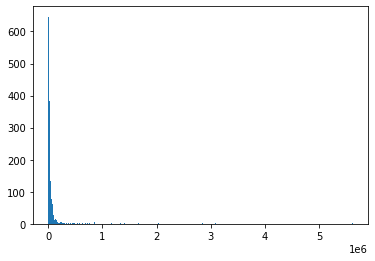

In [ ]:
# distribution of byte sizes of all images
plt.hist(bytes_list, 500)
plt.show()

In [ ]:
bytes_list_unsorted = bytes_list.copy()

In [ ]:
bytes_list.sort(reverse = True)
bytes_list
if(bytes > 500000): # set a threshold of 500000 bytes
    skip image

In [ ]:
len(small_urls)

1819

In [ ]:
# write small urls to brad_urls.txt
with open(r'other_urls.txt', 'w') as fp:
    for item in small_urls:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [ ]:
# read urls.txt into names list
names = []
with open(r'urls.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        names.append(x)

print(names)

['http://farm1.static.flickr.com/43/100299048_855ffa4711_o.jpg', 'http://farm1.static.flickr.com/39/100299580_df91ee7a81_o.jpg', 'http://farm1.static.flickr.com/8/10090770_95698a9f34_o.jpg', 'http://farm1.static.flickr.com/19/106208948_1446e2a149_o.jpg', 'http://farm1.static.flickr.com/40/106209220_f53471955a_o.jpg', 'http://farm1.static.flickr.com/44/106209342_61cd710a68_o.jpg', 'http://farm1.static.flickr.com/48/108551450_28e7a4367f_o.jpg', 'http://farm1.static.flickr.com/35/108551453_75aeea0470_o.jpg', 'http://farm1.static.flickr.com/41/113003114_92321cbd5b_o.jpg', 'http://farm1.static.flickr.com/44/113003899_0ba8fb589a_o.jpg', 'http://farm1.static.flickr.com/53/113003905_a019777583_o.jpg', 'http://farm1.static.flickr.com/36/113809803_82dc095230_o.jpg', 'http://farm1.static.flickr.com/45/114305375_ab8c814f96_o.jpg', 'http://farm1.static.flickr.com/10/11731536_f51053ca3b_o.jpg', 'http://farm1.static.flickr.com/51/119038068_c7e5956c66_o.jpg', 'http://farm1.static.flickr.com/19/1210606

79120


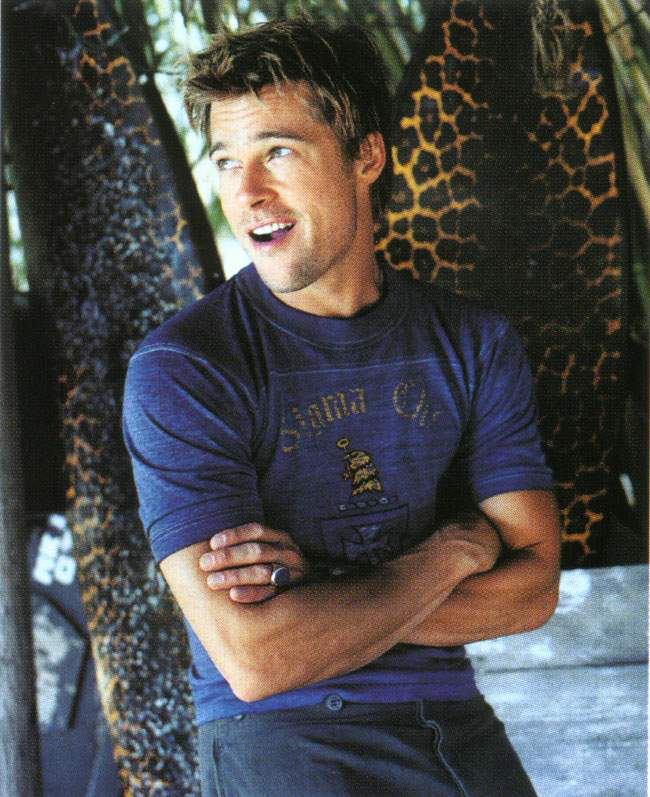

In [ ]:
# hello Brad
url = brad.iloc[0]['url']
response = requests.get(url)
imbytes = BytesIO(response.content)
print(imbytes.getbuffer().nbytes)
img = Image.open(imbytes)
img

In [ ]:
# make a list of all the images
images = []
for i, url in enumerate(small_urls):
    print(i)
    try:
        response = requests.get(url)
        im = Image.open(BytesIO(response.content))
        # crop_region = tuple(int(x) for x in crop_regions[i].split(','))  # uncomment to use cropped images
        # im = im.crop(crop_region)
        images.append(im)
    except:
        continue
print('images downloaded:', len(images))
print('images unavailable:', len(small_urls) - len(images))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# save available images to google drive
for i, im in enumerate(images):
    try:
        path = os.path.join('/content/drive/MyDrive/CIS 5810 Final Project/Brad_dataset/images/Non-Brad Images', 'img' + str(i) + '.' + small_urls[i][-3:])
        im.save(path)
        print(i)
    except OSError:
        print('skipped', i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
skipped 71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
skipped 145
146
147
148
149
150
151
152
153
154
155
156
skipped 157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
skipped 197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
skipped 262
263
264
265
266
26